In [19]:
%matplotlib notebook 

import autograd.numpy as numpy
import autograd.numpy.random as npr

from autograd import grad
from autograd.optimizers import sgd

import matplotlib.pyplot as plot

from collections import OrderedDict

In [20]:
import matplotlib
matplotlib.rc('text', usetex=True)

In [21]:
npr.seed(1234)

In [22]:
n_dim = 1
bias = npr.randn()
noise_std = 1.
tra_ratio = 0.5
n_samples = 100

x_ = 4. * npr.rand(n_samples) - 2.
y_ = numpy.sin(10. * x_) + x_**2

y_ += bias

n_tra = numpy.round(n_samples * tra_ratio).astype('int')
x_tra, y_tra = x_[:n_tra], y_[:n_tra]
x_tes, y_tes = x_[:n_tra], y_[:n_tra]

y_tra = y_tra + noise_std * npr.randn(*y_tra.shape)

In [23]:
def init_params(n_dim, n_hid, scale=0.01):
    w1 = scale * npr.randn(n_dim, n_hid)
    b1 = numpy.zeros(n_hid)
    w2 = scale * npr.randn(n_hid)
    b2 = numpy.zeros(1)
    
    return OrderedDict({'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2})

In [24]:
def tanh(a):
    return numpy.tanh(a)

In [30]:
def mlp(x, p):   
    x = x[:, None] if len(x.shape) < 2 else x
    
    h = tanh(numpy.dot(x, p['w1']) + p['b1'][None,:])
    y = numpy.dot(h, p['w2']) + p['b2']

    return y

In [31]:
def mlp_dist(y, x, p, avg=False):
    y_ = mlp(x, p)
    
    d = ((y - y_) ** 2)
    
    if not avg:
        return d
    return numpy.mean(d)

In [32]:
def cost(p, i):
    return mlp_dist(y_tra, x_tra, p, avg=True)

mlp_rule = grad(cost)

In [33]:
def _callback(p, i, g):
    if numpy.mod(i, 100) == 0:
        print cost(p, i)

In [35]:
params0 = init_params(n_dim=n_dim, n_hid=10)
params = sgd(mlp_rule, params0, callback=_callback, num_iters=2000, step_size=0.1, mass=0.)

4.79714434905
2.03115403804
1.5626591604
1.37542606448
1.34823826049
1.33831386789
1.33285698124
1.3288986241
1.32533609409
1.32152793628
1.31685044367
1.31061044072
1.30253401655
1.29366603279
1.28581385795
1.27979448881
1.2753520018
1.27200445311
1.26940546641
1.26734524811


In [36]:
# visualize data 
def vis_data(x, y, c='r'):
    if y is None: 
        y = [0] * len(x)
    plot.plot(x, y, 'x', markerfacecolor='none', markeredgecolor=c)
    plot.grid('on')

In [39]:
def vis_pred(p, typ='k--'):
    plot.hold('on')

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    m0, m1 = lim0[0], lim0[1]
    
    x_ = numpy.linspace(lim0[0], lim0[1], 100)
    y_ = mlp(x_, p)
    
    plt1, = plot.plot(x_, y_, typ)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    return plt1

<IPython.core.display.Javascript object>


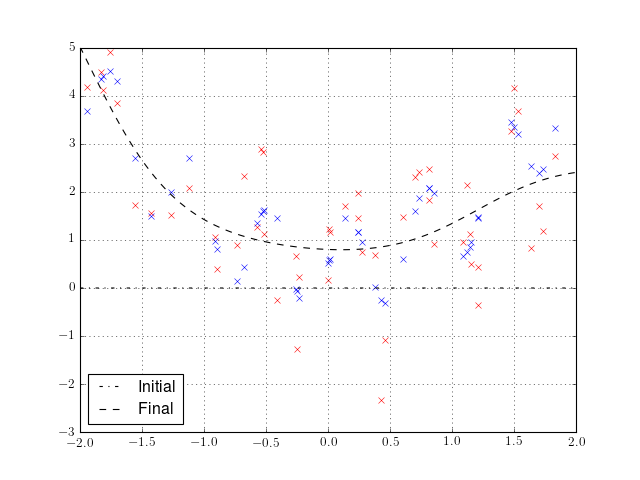

In [40]:
plot.figure()

vis_data(x_tra, y_tra, c='r')
vis_data(x_tes, y_tes, c='b')

plt0 = vis_pred(params0, 'k-.')
plt1 = vis_pred(params, 'k--')
plot.legend([plt0, plt1], [
        'Initial',
        'Final'],
           loc='best')

plot.show()

In [43]:
tra_er = ((mlp(x_tra, params) - y_tra) ** 2).mean()
tes_er = ((mlp(x_tes, params) - y_tes) ** 2).mean()

print 'Training error rate {}, Test error rate {}'.format(tra_er, tes_er)

Training error rate 1.26569214117, Test error rate 0.538579094683
